In [1]:
path = '/Users/liuyu/Downloads/'
file = 'ExtrapStrain_RIT-BBH-0377-n100.h5'

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from CactusTool import TimeSeries
import CactusTool

mode = (2, 2)
with h5py.File(path+file, 'r') as f:
    amp = 'amp_l{}_m{}'.format(mode[0], mode[1])
    phase = 'phase_l{}_m{}'.format(mode[0], mode[1])
    Amp = TimeSeries(f[amp]['X'], f[amp]['Y'])
    Phase = TimeSeries(f[phase]['X'], f[phase]['Y'])
    tstart = max(Amp.tmin, Phase.tmin)
    tend = min(Amp.tmax, Phase.tmax)
    n = max(len(Amp), len(Phase))
    t = np.linspace(tstart, tend, 10*n)
    p = Amp.resample(t)*np.exp(1j*Phase.resample(t))

name = 'RIT0377'
sim = CactusTool.load(name, '/Volumes/simulations/HUST_Catalog/')
mp = sim.ThornOutput('multipole', ftype='h5')
bbh = sim.ThornOutput('TwoPunctures')

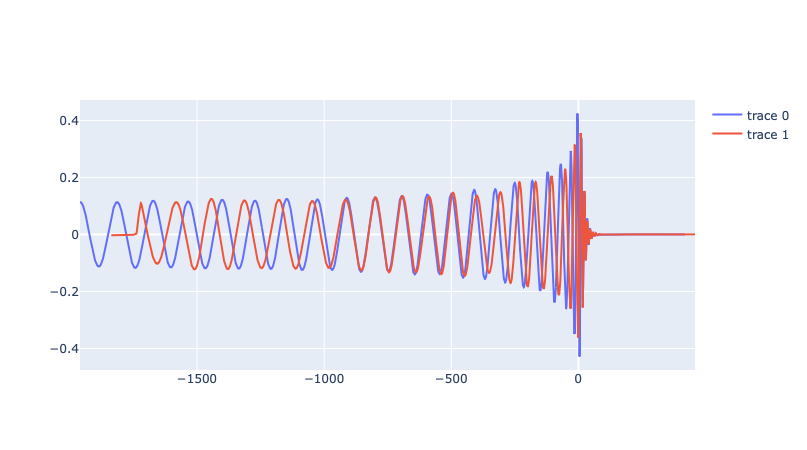

In [15]:
import plotly.graph_objects as go
fig = go.Figure()

p.real().plot(fig)  
mp.Strain(bbh.ADMMass, bbh.CutoffFrequency, (2,2), -1).shift(-1730).real().plot(fig) 

fig.show()